# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We are to implement a K-nearest neighbor (kNN) classifier. Once we conduct the experiments, we will calculate the resulting metrics. 

### b) Defining the Metric for Success

> For knn, we will follow the best practices of optimization. This includes feature selection, splitting the data into subsets to use in modeling. 

### c) Understanding the context 

Transport is fundamental to supporting economic growth, creating jobs and connecting people to essential services such as healthcare or education. But in many developing countries, the benefits are not being realized. One billion people still live more than 2km away from an all-weather road, where lack of access is inextricably linked to poverty. One in six women globally do not look for jobs out of fear of harassment in transit. Road crashes claim over 1.35 million lives every year, 93% of them in developing countries.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

## 2. Reading the Data

In [229]:
# impoerting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Loading the Data from the source i.e. csv
# ---

df = pd.read_csv('/home/mirana/Downloads/core/week 9/train (5).csv')



## 3. Checking the Data

In [230]:
# Determining the no. of records in our dataset
#
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [231]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [233]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. External Data Source Validation

> Expanding sustainable transport options, especially in low-income or vulnerable communities, is a powerful way for countries to bolster human development and social inclusion.

In [234]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### a.Validation

## 5. Tidying the Dataset

In [235]:
# Checking for Outliers
#
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(df[['PassengerId', 'Survived', 'Pclass', 'SibSp','Parch','Fare']])

# Predict outliers
outlier_detector.predict(df[['PassengerId', 'Survived', 'Pclass', 'SibSp','Parch','Fare']])



array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/m

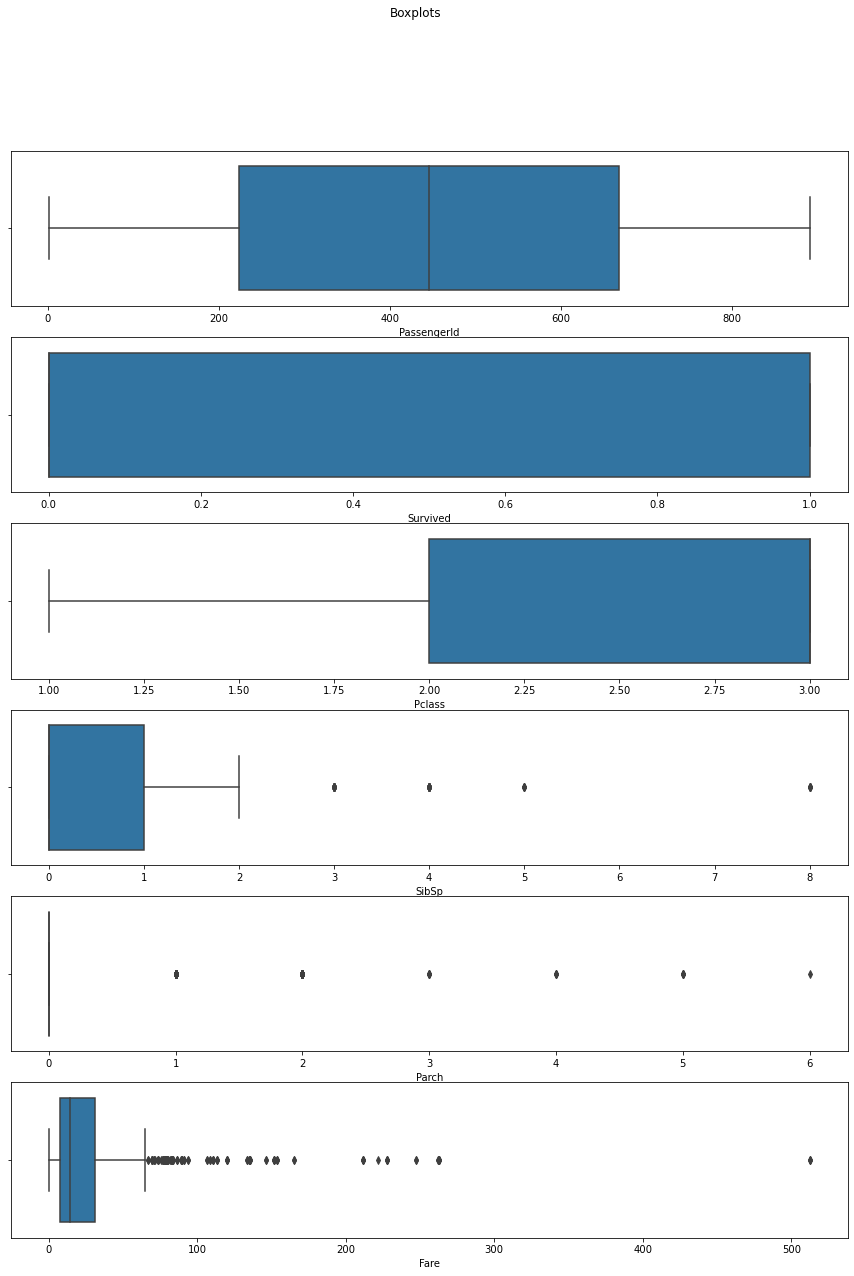

In [236]:
# Checking for Outliers
#
import seaborn as sns
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(15, 20))
fig.suptitle('Boxplots')
sns.boxplot(df['PassengerId'], ax=ax1)
sns.boxplot(df['Survived'], ax=ax2)
sns.boxplot(df['Pclass'], ax=ax3)
sns.boxplot(df['SibSp'], ax=ax4)
sns.boxplot(df['Parch'], ax=ax5)
sns.boxplot(df['Fare'], ax=ax6)

plt.show()

In [237]:
# dealing with outliers

df[df['Fare'] < 100]
df[df['Parch'] < 1]
df[df['SibSp'] < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [238]:
# Checking for Anomalies

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))
isolation_forest.fit(df['Fare'].values.reshape(-1, 1))
df['anomaly_score_rate'] = isolation_forest.decision_function(df['Fare'].values.reshape(-1, 1))
df['anomaly'] = isolation_forest.predict(df['Fare'].values.reshape(-1, 1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,anomaly_score_rate,anomaly
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.160279,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.015949,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.186362,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.045399,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.182873,1


In [239]:
# predicted anomaly
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

     PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
54            55         0       1   
88            89         1       1   
97            98         1       1   
..           ...       ...     ...   
815          816         0       1   
820          821         1       1   
822          823         0       1   
849          850         1       1   
856          857         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
54                      Ostby, Mr. Engelhart Cornelius    male  65.0      0   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
97                     Greenfield, Mr. William Bertram    male  23.0      0   
..                                                 ...     ...   ... 

In [240]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

866

In [241]:
# Dealing with the Missing Data
#
df.dropna(inplace=True)

In [242]:
# More data cleaning procedures
#

df.duplicated().sum()
df.drop_duplicates().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,anomaly_score_rate,anomaly
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.015949,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.045399,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.049843,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.092989,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.128876,1


In [243]:
# confirming no missing values

df.isnull().sum().sum()

0

## 6. Exploratory Analysis

In [244]:
# Ploting the bivariate summaries and recording our observations
#
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,anomaly_score_rate,anomaly
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.016874,0.355191
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.100044,0.937358
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,-0.296225,-1.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,-0.031303,-1.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.034709,1.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.099500,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,0.182873,1.000000


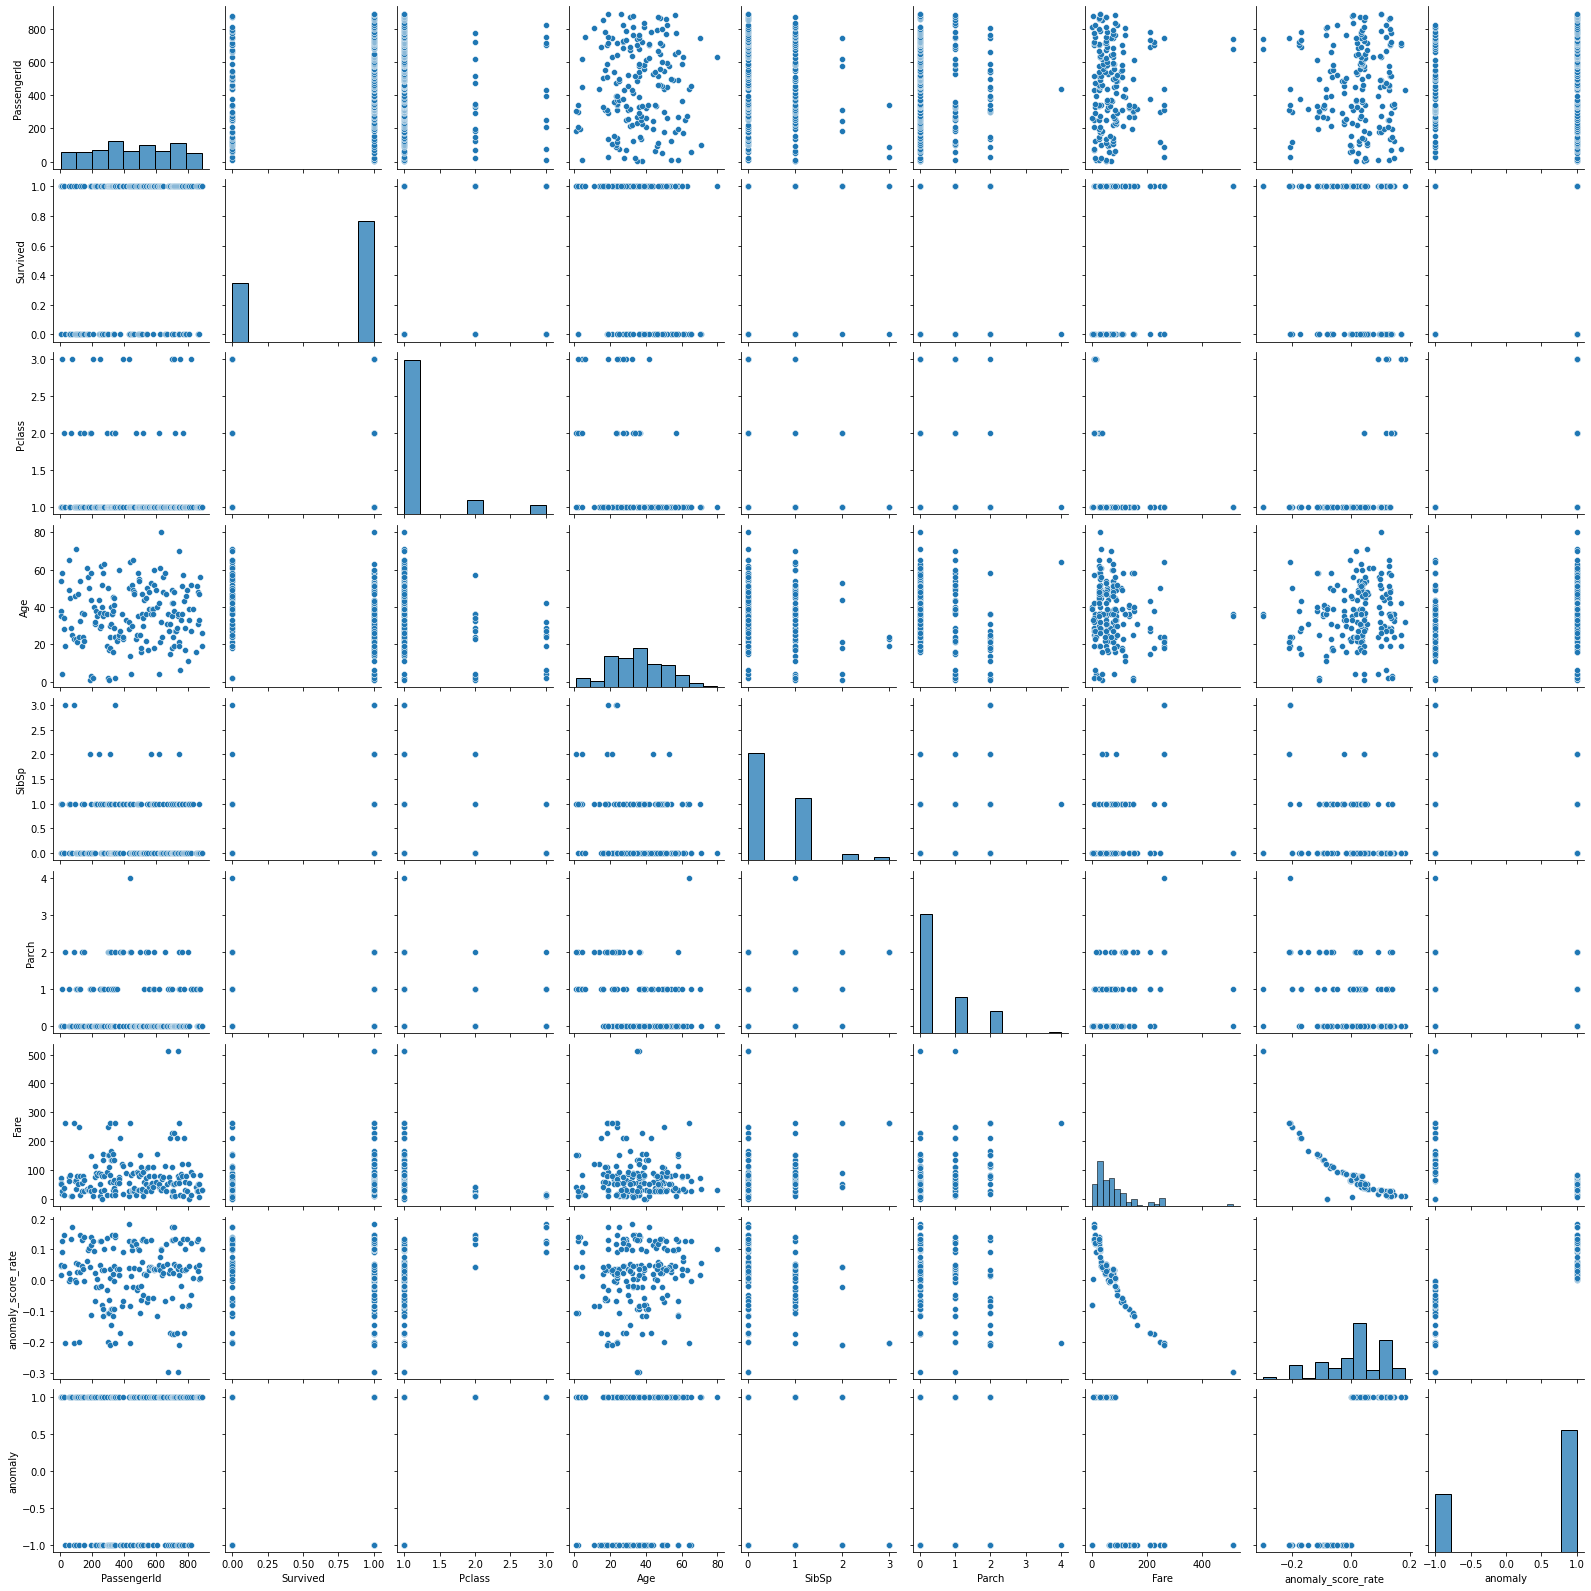

In [245]:
# pairplot 

sns.pairplot(df)
plt.show()

In [246]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'anomaly_score_rate',
       'anomaly'],
      dtype='object')

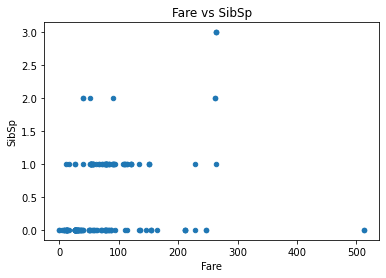

In [247]:
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'Fare', y = 'SibSp', kind='scatter')

# Giving our scatterplot a title
plt.title('Fare vs SibSp')

# Labelling our x axis
plt.xlabel('Fare')

# Labelling our y axis
plt.ylabel('SibSp')

# We then display our scatterplot as shown below
plt.show()

In [248]:
# general correlation
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,anomaly_score_rate,anomaly
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740,-0.015210,0.045583
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241,-0.098821,-0.083289
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235,0.431893,0.256778
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424,0.109646,0.146035
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433,-0.344259,-0.247434
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740,-0.416293,-0.325482
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000,-0.897344,-0.665563
anomaly_score_rate,-0.015210,-0.098821,0.431893,0.109646,-0.344259,-0.416293,-0.897344,1.000000,0.814824
anomaly,0.045583,-0.083289,0.256778,0.146035,-0.247434,-0.325482,-0.665563,0.814824,1.000000


In [249]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


/tmp/ipykernel_12865/4269433385.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [250]:
# Drop features 
df.drop(df[to_drop], axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,anomaly_score_rate,anomaly
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.015949,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.045399,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.049843,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.092989,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.128876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.048846,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.003813,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.007506,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.101414,1


In [251]:
# Data Reduction
#
# testing ratio
# Non stratified sample
non_strat_output = df.sample(frac=0.5) 

# check the proportion of the non_stratified sample
print(non_strat_output['Sex'].value_counts())

male      51
female    41
Name: Sex, dtype: int64


In [252]:
# create a random sample
# dropping the naomaly columns
df = df.drop(columns=['anomaly_score_rate', 'anomaly'])
# Stratified sample
strat_output_train = df.groupby('Sex', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

# proportion of the non_stratified sample
print(df['Sex'].value_counts())

# Check the stratified output
print(strat_output_train)

male      95
female    88
Name: Sex, dtype: int64
     PassengerId  Survived  Pclass                                Name  \
520          521         1       1               Perreault, Miss. Anne   
689          690         1       1   Madill, Miss. Georgette Alexandra   
327          328         1       2             Ball, Mrs. (Ada E Hall)   
215          216         1       1             Newell, Miss. Madeleine   
318          319         1       1            Wick, Miss. Mary Natalie   
..           ...       ...     ...                                 ...   
137          138         0       1         Futrelle, Mr. Jacques Heath   
429          430         1       3  Pickard, Mr. Berk (Berk Trembisky)   
331          332         0       1                 Partner, Mr. Austen   
170          171         0       1           Van der hoef, Mr. Wyckoff   
97            98         1       1     Greenfield, Mr. William Bertram   

        Sex   Age  SibSp  Parch             Ticket      Fare 

In [253]:
# checking info of our sample

strat_output_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 520 to 97
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  92 non-null     int64  
 1   Survived     92 non-null     int64  
 2   Pclass       92 non-null     int64  
 3   Name         92 non-null     object 
 4   Sex          92 non-null     object 
 5   Age          92 non-null     float64
 6   SibSp        92 non-null     int64  
 7   Parch        92 non-null     int64  
 8   Ticket       92 non-null     object 
 9   Fare         92 non-null     float64
 10  Cabin        92 non-null     object 
 11  Embarked     92 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.3+ KB


In [254]:
# preview the stratified train dataset
strat_output_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S


In [255]:
# Stratified test sample

test_strat_dataset = df.drop(strat_output_train.index)

# Preview the stratified test dataset
test_strat_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [256]:
# count
test_strat_count=test_strat_dataset['Sex'].value_counts()
train_strat_count=strat_output_train['Sex'].value_counts()

#test_strat_count
train_strat_count

male      48
female    44
Name: Sex, dtype: int64

## 7. Implementing the Solution

### encoding categorical variables

In [257]:
# Categorical boolean mask
dff = strat_output_train
categorical = dff.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dff.columns[categorical].tolist()

In [258]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [259]:
# applying a one hot encoder
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(dff[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dff.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = dff.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)


In [260]:
# apply le on categorical feature columns
dff[categorical_cols] = dff[categorical_cols].apply(lambda col: le.fit_transform(col))

dff[categorical_cols].head(10)

,Name,Sex,Ticket,Cabin,Embarked
520,67,0,22,18,1
689,53,0,39,15,1
327,6,0,43,45,1
215,61,0,47,53,0
318,90,0,49,38,1
504,54,0,0,19,1
540,24,0,73,8,1
136,63,0,17,55,1
3,36,0,14,26,1
809,20,0,15,73,1


In [261]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
520,521,1,1,67,0,30.0,0,0,22,93.5000,18,1
689,690,1,1,53,0,15.0,0,1,39,211.3375,15,1
327,328,1,2,6,0,36.0,0,0,43,13.0000,45,1
215,216,1,1,61,0,31.0,1,0,47,113.2750,53,0
318,319,1,1,90,0,31.0,0,2,49,164.8667,38,1


In [262]:
# Implementing the Solution
# 
# Splitting our dff into its attributes and labels
# ---
X = dff.drop(['Sex'], axis=1)
y = dff['Sex']

In [263]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [264]:
# Feature Scaling
# ---

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
# Training and Predictions
# ---
 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [268]:
# The final step is to make predictions on our test data
# ---
#  
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [269]:
# Evaluating the Algorithm
# ---

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 4]
 [3 7]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.64      0.70      0.67        10

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.63      0.63      0.63        19



## 8. Challenging the solution

In [270]:
# let us challenge our solution
# we'll use different k values

 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 4]
 [5 5]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.56      0.50      0.53        10

    accuracy                           0.53        19
   macro avg       0.53      0.53      0.53        19
weighted avg       0.53      0.53      0.53        19



In [265]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?

The data seemed very useful, however, some features were missing.

### b). Do we need other data to answer our question?

### c). Did we have the right question?